In [46]:
%connect_info

{
  "control_port": 43309,
  "signature_scheme": "hmac-sha256",
  "transport": "tcp",
  "key": "d8433fff-77933d63223721a69cbadd8d",
  "iopub_port": 46533,
  "stdin_port": 51521,
  "shell_port": 38395,
  "hb_port": 39191,
  "kernel_name": "",
  "ip": "127.0.0.1"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-87634620-21ea-4a5a-b452-c121f66d6edb.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [259]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
import json
import matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np

from lieroy import se3
from recov.registration_algorithm import IcpAlgorithm
from recov.censi import registration_and_censi_estimate_from_points
from recov.datasets import create_registration_dataset
import recova.covariance
import recova.clustering
from recova.descriptor.factory import descriptor_factory
from recova.learning.learning import model_from_file
from recova.registration_result_database import RegistrationPairDatabase

In [261]:
dataset = create_registration_dataset('ethz', '~/dataset/ethz/wood_summer')
database = RegistrationPairDatabase('/home/dlandry/dataset/db_eth_05/')

with open('/home/dlandry/dataset/learning_sets/2018-08-10-wood.json') as f:
    learning_set = json.load(f)

with open('/home/dlandry/dataset/learning_runs/2018-08-13-wood-summer.json') as f:
    learning_run = json.load(f)
    
model = model_from_file('/home/dlandry/dataset/learning_runs/2018-08-13-wood-summer.model', 'cello')

icp_algo = IcpAlgorithm()
icp_algo.estimate_dist_type = 'normal'
icp_algo.initial_estimate_covariance = 0.05
icp_algo.initial_estimate_covariance_rot = 0.05

In [262]:
descriptor_algo = descriptor_factory(learning_run['metadata']['descriptor_config'])

clustering = recova.clustering.CenteredClusteringAlgorithm(0.005, 100)
covariance_algo = recova.covariance.SamplingCovarianceComputationAlgorithm(clustering)
censi_algo = recova.covariance.CensiCovarianceComputationAlgorithm()

In [263]:
all_pairs = database.registration_pairs()

pairs = list(filter(lambda x: x.dataset == 'wood_summer' and x.reference == x.reading - 1, all_pairs))

In [264]:
len(pairs)

36

In [266]:
censi_covariances = np.empty((len(pairs), 6, 6))
icp_results = np.empty((len(pairs), 4, 4))

for i, pair in enumerate(pairs):
    print('{}/{}'.format(i, len(pairs)))
    t, covariance = registration_and_censi_estimate_from_points(pair.points_of_reading(), pair.points_of_reference(), pair.initial_estimate(), icp_algo)
    censi_covariances[i] = covariance
    icp_results[i] = t

0/36


censi_estimate -reading /tmp/f6ef0b12-6501-47d6-ad88-c82116a90e45.qpc -reference /tmp/082d4f31-24d9-444b-8c5a-51dfe4f28456.qpc -ground_truth '[[0.984311, -0.1727, -0.036134, 0.605742], [0.172686, 0.98497, -0.003532, 0.040749], [0.0362, -0.002762, 0.999341, 0.026929], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDataPointsFilter: {maxDensity: 50000}}], transformationCheckers: [
    {CounterTransformationChecker: {maxIterationCount: 40}}, Different

1/36


censi_estimate -reading /tmp/b218e6f2-e6c0-4a39-960a-a8f14b58819a.qpc -reference /tmp/a76da623-78d8-47a3-aaff-63edb06c14fb.qpc -ground_truth '[[0.9807711343448845, 0.19514092864479507, 0.0029454435874470817, 0.6562642677261523], [-0.19516143824810667, 0.9807113498860709, 0.010854277982441297, 0.060698112041799444], [-0.0007694580285669221, -0.011221772016315003, 0.9999363124878511, 0.01089205956102344], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

2/36


censi_estimate -reading /tmp/9067ddee-2907-4769-9da8-2f467624e7e9.qpc -reference /tmp/5bf5ba87-0898-4448-9823-a70909d67687.qpc -ground_truth '[[0.9027463751542558, 0.4301512567601035, -0.004409402076054722, 0.606841761080767], [-0.43012755027505495, 0.9027524494818668, 0.005349940268241928, -0.09953104068431912], [0.006281337239328794, -0.002933071143918736, 0.9999762171253936, 0.014799140556382689], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityD

3/36


censi_estimate -reading /tmp/95c86eed-a4d2-4fd5-b90c-1adc53ae26a2.qpc -reference /tmp/4cba518c-78c2-4499-9a9a-d8e478de392c.qpc -ground_truth '[[0.9086166874095719, 0.4174143200827187, 0.013505050242187233, 0.3738243942549462], [-0.41762320387774643, 0.9083377999322138, 0.022661941778031377, -0.18120856515353345], [-0.00280759573265971, -0.0262306780742072, 0.9996519292967999, 0.004714033619714182], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDat

4/36


censi_estimate -reading /tmp/d20e116d-b595-4376-bed0-baf90681b102.qpc -reference /tmp/3fd6e54d-829e-43ab-9831-8ee861eefd40.qpc -ground_truth '[[0.9222785214884033, 0.3852442456531285, 0.031430555682077276, 0.40621681566427914], [-0.38583811686508784, 0.922434851852034, 0.015517511761818144, 0.033943480626256184], [-0.023014978786430933, -0.026438947830177098, 0.9993847255332573, 0.013959124042771637], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensity

5/36


censi_estimate -reading /tmp/74b7e8d7-169f-4b04-b9ab-dc05cdbdb1b6.qpc -reference /tmp/f2373d4f-50b2-4170-9104-822dec07eeee.qpc -ground_truth '[[0.9202018581773389, -0.3913487080915353, -0.008747128874981715, 0.47972075055199803], [0.3909493340509181, 0.9199307830745649, -0.02979224046593894, 0.05127029574136488], [0.019705500341089775, 0.02399506679631853, 0.9995185507646467, 0.017398709568425652], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDat

6/36


censi_estimate -reading /tmp/bf26c5c2-da14-42d5-9f75-e5a88df768ee.qpc -reference /tmp/540b599b-5f28-4e3d-9616-9caec4ecb7f5.qpc -ground_truth '[[0.8737256359400632, -0.4853626064401001, 0.03205271238289107, 0.4683455270146024], [0.48422994951525733, 0.8741469187398307, 0.03724517323965111, 0.1516032145012145], [-0.0460949771696473, -0.017020497905357306, 0.9987922122641718, -0.015916096267018037], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDataP

7/36


censi_estimate -reading /tmp/24b844d0-c359-497a-89a3-e97f7465af7f.qpc -reference /tmp/564bf415-715e-4c41-bc50-b25ea28253f7.qpc -ground_truth '[[0.9830614630750892, -0.18056329662033, 0.03142553180854404, 0.6001507925057292], [0.1808588470073507, 0.9834854895683821, -0.006782332774284507, 0.014678221618205586], [-0.02968141899709856, 0.012350875426659105, 0.9994824443239041, -0.003594250339808036], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityData

8/36


censi_estimate -reading /tmp/3765468d-640e-4b8b-90c6-17f2f9ce13bb.qpc -reference /tmp/aa4ebb32-5ebf-49e6-bc75-adea3ee95f93.qpc -ground_truth '[[0.9120380954704521, -0.3875466717518785, -0.13414144021057833, 0.6305489666199713], [0.3928199649236236, 0.9195042605508239, 0.014282874137611552, -0.00457504804787201], [0.11780816648484768, -0.06572109190039234, 0.9908595199723996, 0.05711572888203503], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDataP

9/36


censi_estimate -reading /tmp/62cdfd53-56f8-4fe4-8f83-36c157710fb0.qpc -reference /tmp/83dd691a-aeca-4508-a200-77c662750864.qpc -ground_truth '[[0.8021215649759106, -0.5971270361847886, -0.0062934720540098734, 0.4644932895462839], [0.5971077539050751, 0.8018651813810417, 0.021794196268416683, 0.13414242708053026], [-0.007967964800879688, -0.021238238244974783, 0.999742681423744, 0.010068631279607693], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityD

10/36


censi_estimate -reading /tmp/dc8a4495-9fe8-42fd-bcdc-e68147d3d0c3.qpc -reference /tmp/d95d42ac-d45c-441a-a3d2-4b6ff80540db.qpc -ground_truth '[[0.888785538266171, -0.4583071508032395, -0.003851274727317015, 0.5828293712056429], [0.4583178305766763, 0.8886984617524195, 0.012656921671820297, 0.22773604695835648], [-0.00237687997081748, -0.013014552914850222, 0.9999129682027926, 0.01613116323047034], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityData

11/36


censi_estimate -reading /tmp/be7804d0-64e0-458d-b857-2811f0a7fbc0.qpc -reference /tmp/c70df432-38f4-4f61-8fad-c36116c05f76.qpc -ground_truth '[[0.9990590442496504, -0.04329224819145515, -0.002331702630299786, 0.5598954477003291], [0.04329135008073139, 0.9990629336611938, -3.249026733021221e-05, 0.0034492128357204166], [0.0023301838408504826, -6.743522950906821e-05, 0.9999969448771575, 0.016555078395749268], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxD

12/36


censi_estimate -reading /tmp/429cd567-3750-4c10-8e10-938f56e69f63.qpc -reference /tmp/31d43a4e-7c6b-45ac-9953-d06b353b7010.qpc -ground_truth '[[0.9992687231459423, -0.03411536137019232, -0.01727116101134843, 0.5704705423863589], [0.03397167649364166, 0.9993861840639464, -0.008500824219367197, -0.024908625355724467], [0.01755055006766005, 0.007906465673545674, 0.9998146701140858, 0.026225288631292865], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensity

13/36


censi_estimate -reading /tmp/af584599-1aa1-4ab5-aff7-2d4bf87059a7.qpc -reference /tmp/4c8bc757-fe60-4571-ba31-34c8aec5ca84.qpc -ground_truth '[[0.9992934165846233, 0.03648155852341054, -0.008980159114579375, 0.5694014004046912], [-0.03639806504066365, 0.999294965849198, 0.009183834421791631, -0.011739591657168091], [0.009309198171545015, -0.00885055633987888, 0.9999175772761952, 0.01571166291251752], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityD

14/36


censi_estimate -reading /tmp/3dd635a2-96fa-4e68-95cf-61f8391f503d.qpc -reference /tmp/bf26b9a0-a75a-4da3-895d-f2137335c0f8.qpc -ground_truth '[[0.999665378954067, 0.024238118829241016, 0.009154585731252173, 0.6946847248353407], [-0.024113254035904946, 0.9996189018758325, -0.013449544931543324, -0.04225747068163077], [-0.00947804995176676, 0.013224935101024017, 0.9998672445134158, 0.013526516986339665], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensit

15/36


censi_estimate -reading /tmp/4c95229f-ba66-413c-afc3-8f44f39294b5.qpc -reference /tmp/5eda2050-02aa-40d7-9ed4-43f75a9e8ac2.qpc -ground_truth '[[0.9985478438844775, 0.04825927804376921, 0.02396594945334311, 0.7075687248015674], [-0.0483996574317856, 0.9988141589200034, 0.0053130161483682485, 0.0419792100734897], [-0.02368102950800506, -0.00646554078637119, 0.9996986541795747, 0.01327903202554137], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDataP

16/36


censi_estimate -reading /tmp/8193032b-75a4-4544-bc5a-9a7917f9acb1.qpc -reference /tmp/09dfedc5-ab8b-4042-9d9f-c2b1fc9167ca.qpc -ground_truth '[[0.9989906114130505, -0.04081977127204289, -0.018669805739941876, 0.5257254877074273], [0.04093363769762132, 0.9991442455339633, 0.005811063383995258, 0.05540989971421695], [0.018416510389905175, -0.006569045528081656, 0.9998091554713975, 0.020461457371912725], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensity

17/36


censi_estimate -reading /tmp/c98faa44-1a63-4fd3-a9bf-eff524d66a59.qpc -reference /tmp/f5d6c9bb-680e-449b-ae1c-20b1d20de8cb.qpc -ground_truth '[[0.9997959605430283, -0.014195734540317228, -0.014441028249567684, 0.5726597907443036], [0.014233009618496984, 0.9998960111817476, 0.0025046363066690567, 0.041385262408505596], [0.014403477086956835, -0.0027105104419723647, 0.9998927040116192, 0.015997526968810016], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDe

18/36


censi_estimate -reading /tmp/e35be942-2b82-420b-9b44-7e02432e72a6.qpc -reference /tmp/968e92c6-ea74-481f-ac2b-49c269a63249.qpc -ground_truth '[[0.9997071216006654, 0.010370467448214475, 0.021846280011377995, 0.7107778377343044], [-0.010728039371555307, 0.9998096855093691, 0.01631111965032661, 0.007442233082600502], [-0.021671926211191742, -0.016540076758283423, 0.9996279651010517, 0.009499450082807837], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

19/36


censi_estimate -reading /tmp/656afc42-7741-41c2-83ef-2348318d8f35.qpc -reference /tmp/69a913e1-21da-4036-ade9-6980bddfbdc5.qpc -ground_truth '[[0.9954027011895686, 0.09575570301645497, 0.001959284771490313, 0.48194273651794806], [-0.09576369046066667, 0.9953880717722493, 0.00564222008801716, 0.027988004743547457], [-0.00140932599843702, -0.0058043748956424545, 0.9999821535826867, 0.014775680401204], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDa

20/36


censi_estimate -reading /tmp/d90c8258-718d-4504-be4d-42620aa59dad.qpc -reference /tmp/07e1504d-7039-432e-8b2d-2b9734bc8613.qpc -ground_truth '[[0.9964083680230574, -0.011507067269412903, -0.08389067773716381, 0.6281750787179767], [0.012016875396822857, 0.9999114738458077, 0.005584450190459925, 0.06783947798696133], [0.08381874142791729, -0.006572015484472108, 0.9964602764724196, 0.03149882901291853], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityD

21/36


censi_estimate -reading /tmp/6237a515-7d83-48df-a11c-72a553cfa401.qpc -reference /tmp/92b27a2a-beb3-4f2b-b928-77c45128e107.qpc -ground_truth '[[0.992471837850419, -0.09979411943274523, 0.071017214151677, 0.653146828110593], [0.10181084623484662, 0.9944811328559214, -0.025355983031692324, -0.022938380741198472], [-0.0680959147648151, 0.032394200787671225, 0.9971524956527589, -0.017218569568037356], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityData

22/36


censi_estimate -reading /tmp/93368e96-bbf6-4a26-b124-07df1ef66160.qpc -reference /tmp/48acf3db-37b2-4ac9-8821-fa948a4fd2b2.qpc -ground_truth '[[0.9950273622194599, 0.0995604825566166, 0.00219871081754076, 0.6526338301644623], [-0.09953940453890896, 0.9949977704972401, -0.008420359966594012, -0.053067608824906465], [-0.003026246429369216, 0.008160676998004162, 0.9999617971010686, 0.021549944143166883], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensity

23/36


censi_estimate -reading /tmp/6556a1ba-430c-4c17-99d4-4936b43790c5.qpc -reference /tmp/8a7e2df4-8c20-4a38-a959-de05fd8d09a6.qpc -ground_truth '[[0.9986024618653445, -0.039493072821082956, -0.035125864203183824, 0.6047827823545351], [0.040839911370684476, 0.9984247175011393, 0.038480208043071236, -0.008504296832562375], [0.03355230246552637, -0.03986119281783898, 0.9986423279034082, 0.025782202938594873], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

24/36


censi_estimate -reading /tmp/ef3613e8-bf23-4908-976e-e4925e990366.qpc -reference /tmp/ccf306db-748b-482c-bb68-122d6f903448.qpc -ground_truth '[[0.9991534053563801, 0.03887609630097036, 0.0134487508101724, 0.5506190578145276], [-0.03823763403661336, 0.9982611138094083, -0.044856793171951403, -0.0021435971208383364], [-0.015170381134620181, 0.04430510708988761, 0.9989031645316832, 0.006779025773460345], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensity

25/36


censi_estimate -reading /tmp/9694f987-767c-410c-970a-3988145b1d4e.qpc -reference /tmp/45266b3c-2f33-492c-bed3-26857d49122e.qpc -ground_truth '[[0.9988782495809371, -0.04300107344945523, 0.01990126297006015, 0.6379249851494926], [0.04231075887484863, 0.998530645036567, 0.03387020613688461, -0.025175178470264292], [-0.021327904724808718, -0.03299062098085392, 0.9992268326990044, 0.020488812136343543], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityDa

26/36


censi_estimate -reading /tmp/87e7846a-7b9f-4bb9-9e3b-d303d8998567.qpc -reference /tmp/4b3c0637-a490-4cb4-a8e5-e1dc5331ca19.qpc -ground_truth '[[0.9999271517214634, -0.011962459527338534, -1.2988299861608178e-05, 0.5600217775392657], [0.011961929680612417, 0.9999281471931851, -0.0011063929793718923, 0.021077521678011912], [2.5766310962831796e-05, 0.0011056785026309329, 0.9999997133398865, 0.020349140259129372], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {M

27/36


censi_estimate -reading /tmp/cd20e222-dc77-4ccd-a797-7bf37ad99859.qpc -reference /tmp/8723c302-316e-4579-b3b9-7c7586dca4d6.qpc -ground_truth '[[0.9989013692685186, 0.04682063562556736, -0.0024098006050078087, 0.6541827020789661], [-0.04684085841359652, 0.9988573090531526, -0.009414439711088522, -0.035236156988488254], [0.0019656538544719085, 0.009517362704738245, 0.9999533014629145, 0.018294439559431525], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDen

28/36


censi_estimate -reading /tmp/26cc539d-20dd-453a-9167-11d7683cb924.qpc -reference /tmp/6c9ba3e7-8142-4879-82e6-340de4028ea2.qpc -ground_truth '[[0.9976974466671018, 0.0663847288710241, -0.013780246858835029, 0.622498431182466], [-0.06640062453619557, 0.9977921830626687, -0.0007545971072089436, -0.047758559350477015], [0.013700541051980961, 0.0016668498965438025, 0.9999040303848101, 0.022102602525321834], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

29/36


censi_estimate -reading /tmp/035a39fd-376d-4f49-acec-2b85eaa12df2.qpc -reference /tmp/59f50bd3-95cf-4718-bd41-e30e5244dfe8.qpc -ground_truth '[[0.9987983001964933, 0.04733444279611517, -0.012762302451879258, 0.6102636942249227], [-0.047054445337846175, 0.9986628775647255, 0.021419355561985008, 0.051437361031030804], [0.013759742516878474, -0.020791260008455246, 0.999689630759783, 0.019002360760604492], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensit

30/36


censi_estimate -reading /tmp/0829e236-d68b-4749-8d11-24d494977eef.qpc -reference /tmp/5dc52fe2-9934-4014-b2ab-2ab8fcd22d3a.qpc -ground_truth '[[0.9999416581286522, 0.0015298172472961475, 0.010770253208951495, 0.7141973624178686], [-0.001836244526110439, 0.9995931431227951, 0.028465037384024856, -0.01751190037813366], [-0.010723242599986695, -0.028483386345406304, 0.9995358359616827, 0.0160886183072399], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

31/36


censi_estimate -reading /tmp/266ab487-b740-426c-ba2b-111f0795ab7b.qpc -reference /tmp/a9a3bacb-daa7-4f0f-bfff-d1172c47ba1d.qpc -ground_truth '[[0.9996542175581844, 0.02469143016272393, 0.008886458315362894, 0.6978838556635054], [-0.02413843146054936, 0.9980391171982158, -0.05775328962102538, -0.05524468545524952], [-0.010294657229309298, 0.057518457139838546, 0.9982912896463787, -0.0003441593044271052], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

32/36


censi_estimate -reading /tmp/f4dd9af9-ddc2-48e2-b5ee-5502ea88402d.qpc -reference /tmp/25bf0676-3fd5-4cb1-ba16-ead630c50bc7.qpc -ground_truth '[[0.999587538388975, 0.028518754562615677, 0.0034814626276718596, 0.6243723232194061], [-0.02839593908945615, 0.9991103026058219, -0.031192599068218866, -0.032723294070595266], [-0.004368659463674203, 0.03108141181869255, 0.9995080860469329, 0.007341589536512771], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

33/36


censi_estimate -reading /tmp/ddc7a525-047e-474f-b834-c9be5b580f09.qpc -reference /tmp/6791ad18-518b-4e07-9bd0-9b4fcdcfa555.qpc -ground_truth '[[0.9997617512090907, -0.016776532712167405, -0.013983549508132114, 0.5749339960072462], [0.016846787711473354, 0.9998459062056397, 0.00492460848775844, 0.07081090810971036], [0.013898972551416883, -0.0051586971373975945, 0.9998906667435695, 0.017288905045359265], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensi

34/36


censi_estimate -reading /tmp/f863f1e3-9dcf-46c9-af4a-c89fa772f1e8.qpc -reference /tmp/dd60b9a9-3cf8-430a-8fde-4f6fe25e2b2a.qpc -ground_truth '[[0.9964566700266582, 0.0812208190503148, 0.02185100806063196, 0.5149004396603072], [-0.08111443938790766, 0.9966889172073529, -0.005705785452892926, 0.032078325334238045], [-0.022240405260142534, 0.003912235345591222, 0.999744019988957, 0.0017465514415960226], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensityD

35/36


censi_estimate -reading /tmp/3baa3acc-7b49-4747-b914-df919f1f02c2.qpc -reference /tmp/052fbf4e-4dea-4078-8ad0-487df610dffa.qpc -ground_truth '[[0.9995893215519372, -0.027168187172382747, 0.009165016406650624, 0.5830997225010393], [0.02708793936173571, 0.9995940172074274, 0.008745584470023231, -0.06883718254708981], [-0.00940056887531434, -0.008492932268303055, 0.9999194417856201, 0.013928687787806315], [0.0, 0.0, 0.0, 1.0]]' -config '{errorMinimizer: PointToPlaneWithCovErrorMinimizer, inspector: NullInspector, logger: NullLogger,
  matcher: {KDTreeMatcher: {knn: 3}}, outlierFilters: [{TrimmedDistOutlierFilter: {
        ratio: 0.7}}], readingDataPointsFilters: [{SurfaceNormalDataPointsFilter: {
        keepDensities: 1, keepEigenValues: 1, knn: 20}}, {RandomSamplingDataPointsFilter: {
        prob: 0.75}}, {MaxDensityDataPointsFilter: {maxDensity: 50000}}], referenceDataPointsFilters: [
    {SurfaceNormalDataPointsFilter: {keepDensities: 1, keepEigenValues: 1, knn: 20}},
    {MaxDensit

In [267]:
descriptors = np.zeros((len(pairs), len(descriptor_algo.labels())))

for i, pair in enumerate(pairs):
    descriptors[i] = descriptor_algo.compute(pair)

predictions = model.predict(descriptors)

In [268]:
def build_trajectory(ts):
    trajectory = np.empty((len(ts) + 1, 4, 4))
    trajectory[0] = np.identity(4)
    for i in range(len(ts)):
        trajectory[i+1] = ts[i] @ trajectory[i]
        
    return trajectory

In [269]:
icp_trajectory = build_trajectory(icp_results)
icp_trajectory.shape

(37, 4, 4)

In [270]:
ground_truth = np.empty((dataset.n_clouds(), 4, 4))
for i in range(len(ground_truth) - 1):
    ground_truth[i] = dataset.ground_truth(i+1, i)
    
gt_trajectory = build_trajectory(ground_truth)
gt_trajectory.shape

(38, 4, 4)

In [271]:
def plot_trajectory(trajectory, ax, color=None):
    ax.plot(trajectory[:,0,3], trajectory[:,1,3], color=color)


In [272]:
def mahalanobis(diff, covariance):
    return np.sqrt(diff @ (np.linalg.inv(covariance) @ diff))

In [278]:
def plot_covariance(mean, covariance, ax):
    eigvals, eigvecs = np.linalg.eig(covariance[0:2,0:2])
    angle = np.arctan2(eigvecs[0,0], eigvecs[0,1]) * 360 / (2 * np.pi)
    width, height = 3 * np.sqrt(eigvals)

    ellipse = matplotlib.patches.Ellipse(xy=mean[0:2,3], width=width, height=height, angle=angle * 360 / (2 * np.pi), fill=False)
    ax.add_artist(ellipse)
    
    

In [279]:
cum_censi_estimate = np.cumsum(censi_covariances, axis=0)
cum_cello_estimate = np.cumsum(predictions, axis=0)

<IPython.core.display.Javascript object>


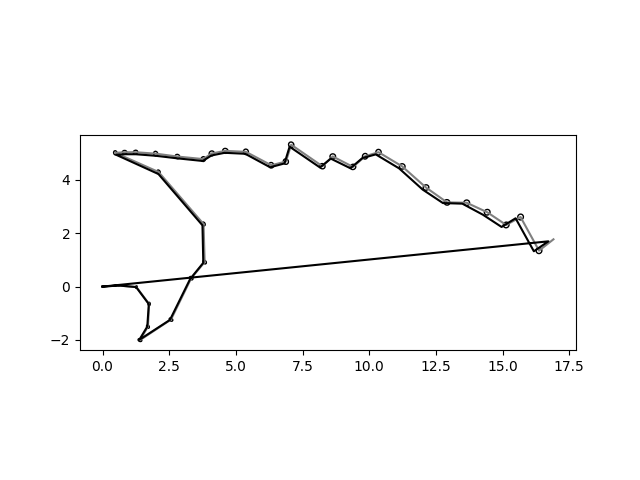

In [280]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

plot_trajectory(icp_trajectory, ax, color='0.5')
plot_trajectory(gt_trajectory, ax, color='0.0')

for i in range(len(icp_trajectory) - 1):
    plot_covariance(icp_trajectory[i], cum_cello_estimate[i], ax)


plt.show()

In [223]:


censi_mahalanobis = np.empty(len(icp_trajectory))
cello_mahalanobis = np.empty(len(icp_trajectory))
for i in range(len(icp_trajectory)):
    diff = np.linalg.inv(icp_trajectory[i]) @ gt_trajectory[i]
    diff_algebra = se3.log(diff)
    
    inv_cov = np.linalg.inv(cum_cello_estimate)
    
    cello_mahalanobis[i] = mahalanobis(diff_algebra, cum_cello_estimate[i])
    censi_mahalanobis[i] = mahalanobis(diff_algebra, cum_censi_estimate[i])

<IPython.core.display.Javascript object>


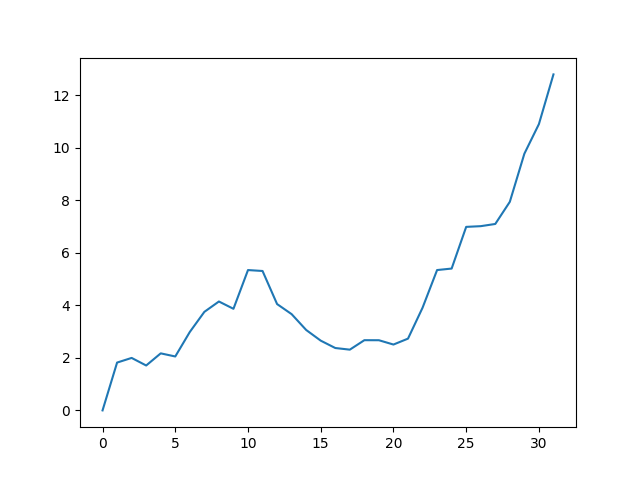

In [225]:
fig, ax = plt.subplots()

ax.plot(list(range(len(cello_mahalanobis))), cello_mahalanobis)
#plt.plot(list(range(len(censi_mahalanobis))), censi_mahalanobis)

In [164]:
plt.show()